# Baseline

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import imblearn
from collections import Counter
from numpy import where
from matplotlib import pyplot

In [55]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read the data

In [56]:
df = pd.read_csv('../data/CM1.csv')
df = df.drop('DECISION_DENSITY', 1)
df = df.drop('CALL_PAIRS', 1)
df = df.drop('CONDITION_COUNT', 1)
df = df.drop('DECISION_COUNT', 1)
df = df.drop('PARAMETER_COUNT', 1)
df = df.drop('GLOBAL_DATA_COMPLEXITY', 1)
df = df.drop('GLOBAL_DATA_DENSITY', 1)
df = df.drop('MAINTENANCE_SEVERITY', 1)
df = df.drop('MODIFIED_CONDITION_COUNT', 1)
df = df.drop('MULTIPLE_CONDITION_COUNT', 1)
df = df.drop('NODE_COUNT', 1)
df = df.drop('NORMALIZED_CYLOMATIC_COMPLEXITY', 1)
df = df.drop('PATHOLOGICAL_COMPLEXITY', 1)
df = df.drop('PERCENT_COMMENTS', 1)
df = df.drop('CYCLOMATIC_DENSITY', 1)
df = df.drop('DESIGN_COMPLEXITY', 1)
df = df.drop('EDGE_COUNT', 1)
df = df.drop('ESSENTIAL_DENSITY', 1)
df = df.drop('NUMBER_OF_LINES', 1)
df = df.drop('HALSTEAD_PROG_TIME', 1)
df = df.drop('DESIGN_DENSITY', 1)

In [57]:
df.columns

Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE',
       'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT',
       'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL',
       'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL',
       'Defective'],
      dtype='object')

In [58]:
le = preprocessing.LabelEncoder()
df['Defective'] = le.fit_transform(df.Defective.values)

In [59]:
# delete unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# convert all columns of DataFrame
df = df.dropna()
# find the objects columns
cols = df.columns[df.dtypes.eq('object')]
# convert to numeric these columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [60]:
columns = df.columns
columns = columns[:-1]
X = df[columns].to_numpy()
y = df.Defective.to_numpy()

In [61]:
type(X)

numpy.ndarray

In [62]:
counter = Counter(y)
print(counter)

Counter({0: 457, 1: 48})


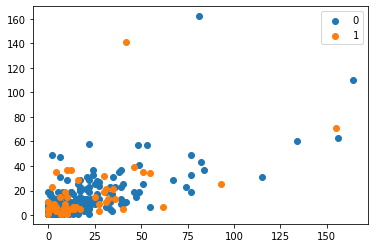

In [63]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [64]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

AttributeError: 'SMOTE' object has no attribute '_validate_data'

In [27]:
counter = Counter(y)
print(counter)

Counter({0: 457, 1: 48})


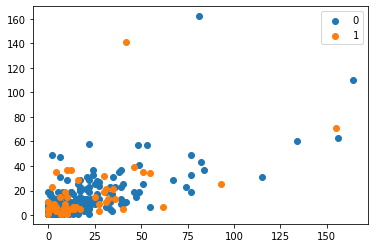

In [28]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Cross-Validation

In [98]:
seed = 7
#array = df.values
#X = array[:,0:19]
#Y = array[:,19]
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [99]:
scoring = 'f1'

In [100]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [101]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/geanderson/sources/anomaly-detection/envano/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/geanderson/sources/anomaly-detection/envano/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

LR: 0.741760 (0.034416)
KNN: 0.730536 (0.035830)
CART: 0.847056 (0.017646)
NB: 0.552523 (0.022551)
SVM: 0.586484 (0.055940)
RF: 0.914745 (0.020581)


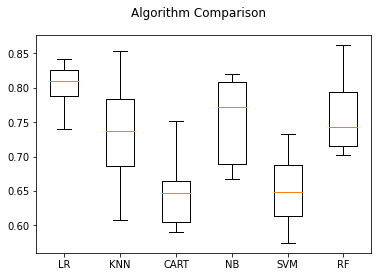

In [75]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [77]:
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [78]:
predictions = mlp.predict(X_validation)

In [79]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold = roc_curve(Y_validation, mlp.predict_proba(X_validation)[:,1])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)

0.7514614541468763


##### That's all folks!!!